# Performance Analysis

In [51]:
!pip install scipy
!pip install matplotlib
!pip install pandas
!pip install pickle
import pickle
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.ndimage import gaussian_filter1d 
import os


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


## Baseline model

In [52]:
experiments = []
directory = './experiments/ss'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    file = open(f, 'rb')
    experiments.append(pickle.load(file))

In [53]:
# Average results

transposed_array = zip(*experiments)
# Calculate the average for each position
result_array = gaussian_filter1d([sum(position) / len(position) for position in transposed_array], sigma=10)

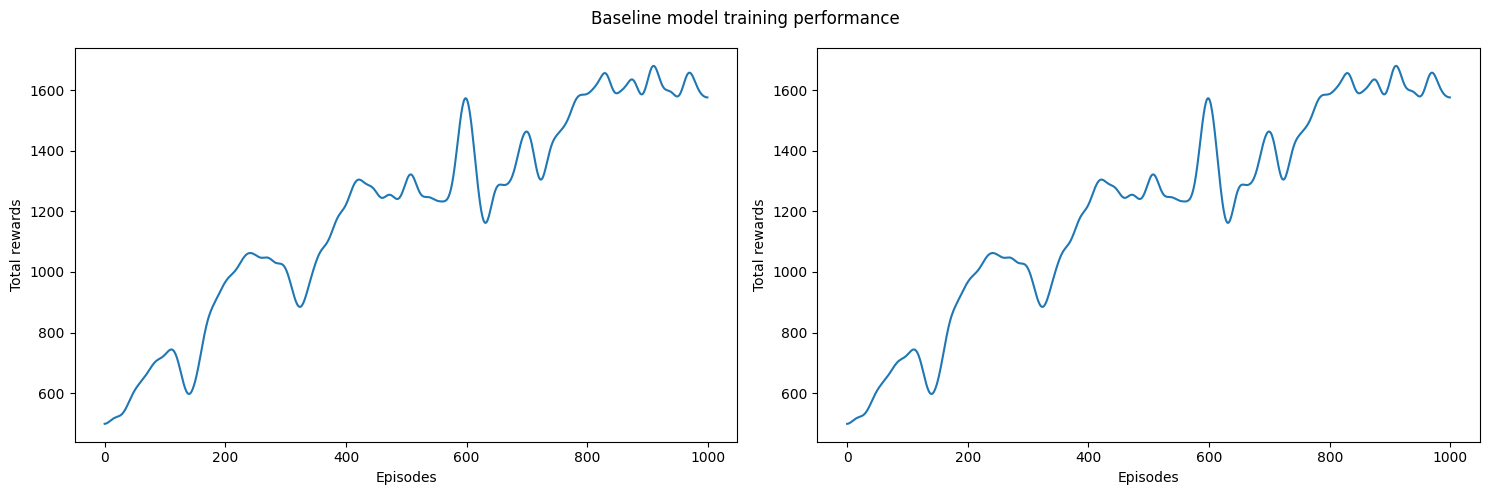

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for ax in axes:
    ax.set_ylabel("Total rewards")
    ax.set_xlabel("Episodes")

for index, ax in enumerate(axes):
    ax.plot(result_array)
    
fig.suptitle("Baseline model training performance")
fig.tight_layout()

## N-Frame merging

In [55]:
experiments = []
directory = './experiments/unet'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    file = open(f, 'rb')
    experiments.append(pickle.load(file))

In [56]:
# Average results

transposed_array = zip(*experiments)
# Calculate the average for each position
result_array = gaussian_filter1d([sum(position) / len(position) for position in transposed_array], sigma=10)

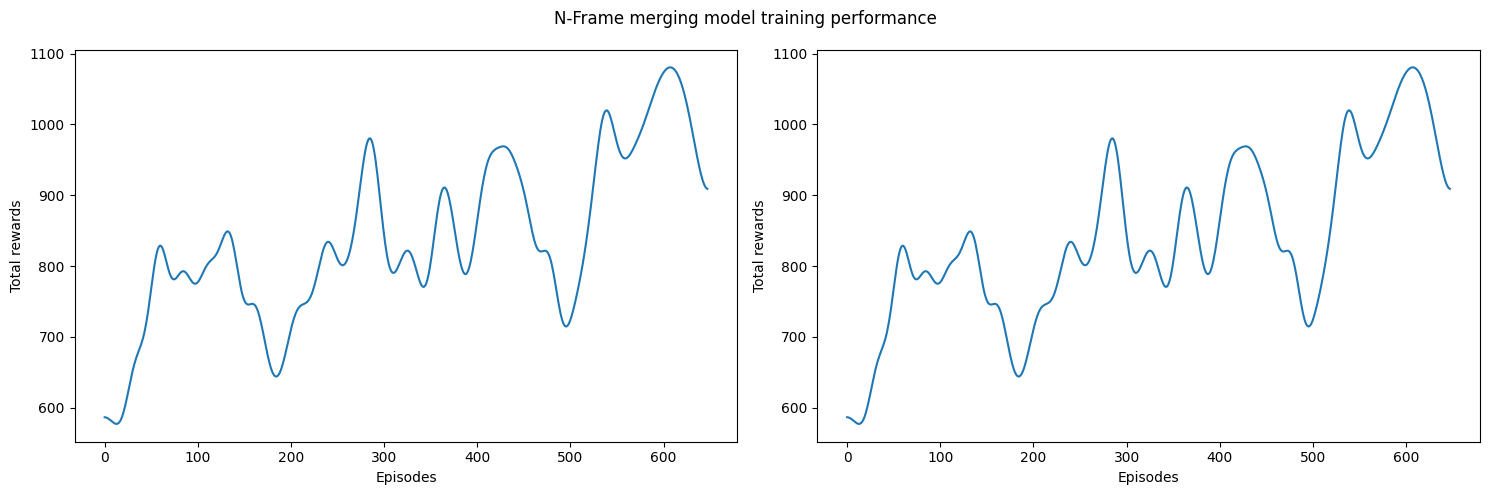

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for ax in axes:
    ax.set_ylabel("Total rewards")
    ax.set_xlabel("Episodes")

for index, ax in enumerate(axes):
    ax.plot(result_array)
    
fig.suptitle("N-Frame merging model training performance")
fig.tight_layout()

## Comparison

In [58]:
baseline_experiments = []
directory = './experiments/ss'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    file = open(f, 'rb')
    baseline_experiments.append(pickle.load(file))
    
transposed_array = zip(*baseline_experiments)
baseline_result_array = gaussian_filter1d([sum(position) / len(position) for position in transposed_array], sigma=10)

In [59]:
unet_experiments = []
directory = './experiments/unet'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    file = open(f, 'rb')
    unet_experiments.append(pickle.load(file))
    
transposed_array = zip(*unet_experiments)
unet_result_array = gaussian_filter1d([sum(position) / len(position) for position in transposed_array], sigma=10)

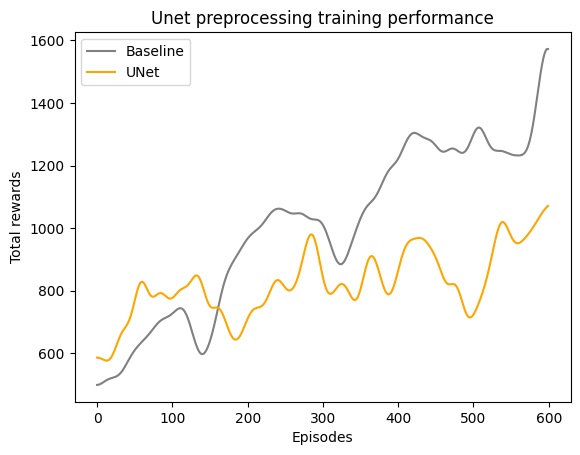

In [60]:
plt.plot(baseline_result_array[:600], label='Baseline', color='gray')
plt.plot(unet_result_array[:600], label='UNet', color='orange')
plt.ylabel("Total rewards")
plt.xlabel("Episodes")    
plt.title("Unet preprocessing training performance")
plt.legend()
plt.savefig("unet_performances")

In [61]:
unet_experiments = []
directory = './experiments/unet_layer3'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    file = open(f, 'rb')
    unet_experiments.append(pickle.load(file))

transposed_array = zip(*unet_experiments)
unet_layer3_result_array = gaussian_filter1d([sum(position) / len(position) for position in transposed_array], sigma=10)

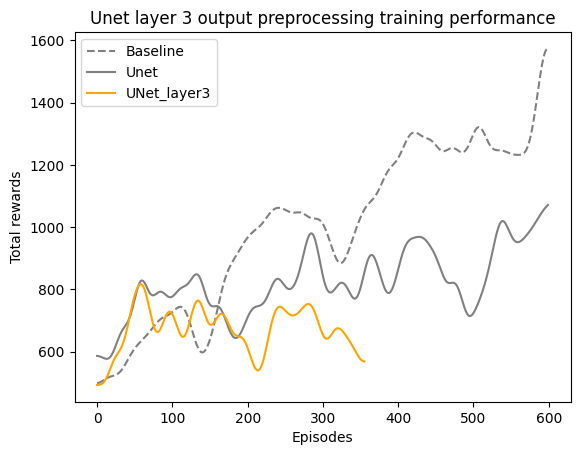

In [62]:
plt.plot(baseline_result_array[:600], label='Baseline', color='gray', linestyle='dashed')
plt.plot(unet_result_array[:600], label='Unet', color='gray')
plt.plot(unet_layer3_result_array[:600], label='UNet_layer3', color='orange')
plt.ylabel("Total rewards")
plt.xlabel("Episodes")
plt.title("Unet layer 3 output preprocessing training performance")
plt.legend()
plt.savefig("unet_performances")